<a href="https://colab.research.google.com/github/sandipanpaul21/ML-Clustering-in-Python/blob/master/11_DBScan_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# DBSCAN

# Density-based spatial clustering of applications with noise, or DBSCAN 
# It is a popular clustering algorithm used as a replacement for k-means clustering
# To run it doesn’t require an input for the number of clusters 
# But DBSCAN does need to tune two other parameters
# 'eps' parameter is the maximum distance between two data points 
# to be considered in the same neighborhood. 
# 'min_samples' parameter is the minimum amount of data points 
# in a neighborhood to be considered a cluster

# Silhouette Score
# Clusters are well apart from each other as the silhouette score is closer to 1
# Silhouette Coefficient score is a metric used to calculate the goodness of a clustering technique 
# Its value ranges from -1 to 1.
# 1: Means clusters are well apart from each other and clearly distinguished.
# 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
# -1: Means clusters are assigned in the wrong way.

In [2]:
# Importing Libraries

from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score

In [3]:
# Loading the Dataset

iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Preparing Data

# Here we have the target variable ‘Type’. 
# We need to remove the target variable, used to work in an unsupervised learning 
# The iloc function is used to get the features we require. 
# We also use .values function to get an array of the dataset. 
# Note that we transformed the dataset to an array so that we can plot the graphs of the clusters

iris_X = iris_data.iloc[:, [0, 1, 2,3]].values
print(iris_X[:5,:]) # Printing First 5 Rows

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [5]:
# Now we will separate the target variable from the original dataset 
# And again convert it to an array by using numpy
iris_Y = iris_data['Type']
iris_Y = np.array(iris_Y)
print(iris_Y)
# Frequency count of the Output clusters
unique, counts = np.unique(iris_Y, return_counts=True)
freq_2 = dict(zip(unique, counts))
print(freq_2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
{0: 50, 1: 50, 2: 50}


In [6]:
# Filtering Setosa

Setosa = iris_data['Type'] == 0
print("Filtering Setosa, True means its Setosa and False means Non Setosa")
print(Setosa.head())
print("Top 6 Rows of Setosa")
Setosa_v2 = iris_data[Setosa]
print(Setosa_v2[Setosa_v2.columns[0:2]].head())
print("Last 6 Rows of Setosa")
print(Setosa_v2[Setosa_v2.columns[0:2]].tail())

Filtering Setosa, True means its Setosa and False means Non Setosa
0    True
1    True
2    True
3    True
4    True
Name: Type, dtype: bool
Top 6 Rows of Setosa
   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6
Last 6 Rows of Setosa
    sepal length (cm)  sepal width (cm)
45                4.8               3.0
46                5.1               3.8
47                4.6               3.2
48                5.3               3.7
49                5.0               3.3


Setosa for 2D Plot
X Axis points
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]
Y Axis Points
[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3]




(2.0, 4.5)

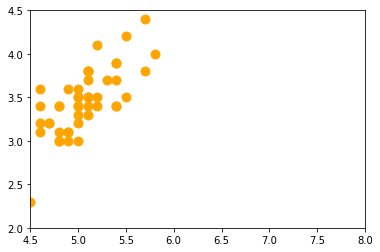

In [7]:
# Filtering Setosa for 2D Plot 

print("Setosa for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 0,0])
print("Y Axis Points")
print(iris_X[iris_Y == 0,1])
print('\n')
# For Setosa in Target Column i.e, iris_Y = 0 
# In other word it should range from (0,0) to (0,1)
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], 
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.xlim([4.5,8])
plt.ylim([2,4.5])

In [8]:
# Filtering Versicolour

Versi = iris_data['Type'] == 1
print("Filtering Versicolour, True means its Versicolour and False means Non Versicolour")
print(Versi.head())
print("Top 6 Rows of Versicolour")
Versi_v2 = iris_data[Versi]
print(Versi_v2[Versi_v2.columns[0:2]].head())
print("Last 6 Rows of Versicolour")
print(Versi_v2[Versi_v2.columns[0:2]].tail())

Filtering Versicolour, True means its Versicolour and False means Non Versicolour
0    False
1    False
2    False
3    False
4    False
Name: Type, dtype: bool
Top 6 Rows of Versicolour
    sepal length (cm)  sepal width (cm)
50                7.0               3.2
51                6.4               3.2
52                6.9               3.1
53                5.5               2.3
54                6.5               2.8
Last 6 Rows of Versicolour
    sepal length (cm)  sepal width (cm)
95                5.7               3.0
96                5.7               2.9
97                6.2               2.9
98                5.1               2.5
99                5.7               2.8


Versicolour for 2D Plot
X Axis points
[7.  6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8
 6.2 5.6 5.9 6.1 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.
 6.7 6.3 5.6 5.5 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7]
Y Axis Points
[3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7
 2.2 2.5 3.2 2.8 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4
 3.1 2.3 3.  2.5 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8]




(2.0, 4.5)

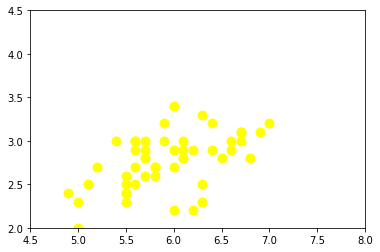

In [9]:
# Filtering Versicolour for 2D Plot 

print("Versicolour for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 1,0])
print("Y Axis Points")
print(iris_X[iris_Y == 1,1])
print('\n')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], 
            s = 80, c = 'yellow', label = 'Iris-versicolour')

plt.xlim([4.5,8])
plt.ylim([2,4.5])

In [10]:
# Filtering Virginica

Virginica = iris_data['Type'] == 2
print("Filtering Virginica, True means its Virginica and False means Non Virginica")
print(Virginica.head())
print("Top 6 Rows of Virginica")
Virginica_v2 = iris_data[Virginica]
print(Virginica_v2[Virginica_v2.columns[0:2]].head())
print("Last 6 Rows of Virginica")
print(Virginica_v2[Virginica_v2.columns[0:2]].tail())

Filtering Virginica, True means its Virginica and False means Non Virginica
0    False
1    False
2    False
3    False
4    False
Name: Type, dtype: bool
Top 6 Rows of Virginica
     sepal length (cm)  sepal width (cm)
100                6.3               3.3
101                5.8               2.7
102                7.1               3.0
103                6.3               2.9
104                6.5               3.0
Last 6 Rows of Virginica
     sepal length (cm)  sepal width (cm)
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0


Virginica for 2D Plot
X Axis points
[6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7
 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7
 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8 6.7 6.7 6.3 6.5 6.2 5.9]
Y Axis Points
[3.3 2.7 3.  2.9 3.  3.  2.5 2.9 2.5 3.6 3.2 2.7 3.  2.5 2.8 3.2 3.  3.8
 2.6 2.2 3.2 2.8 2.8 2.7 3.3 3.2 2.8 3.  2.8 3.  2.8 3.8 2.8 2.8 2.6 3.
 3.4 3.1 3.  3.1 3.1 3.1 2.7 3.2 3.3 3.  2.5 3.  3.4 3. ]




(2.0, 4.5)

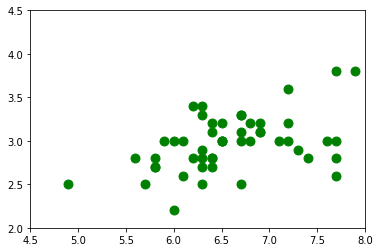

In [11]:
# Filtering Virginica for 2D Plot

print("Virginica for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 2,0])
print("Y Axis Points")
print(iris_X[iris_Y == 2,1])
print('\n')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], 
            s = 80, c = 'green', label = 'Iris-virginica')
plt.xlim([4.5,8])
plt.ylim([2,4.5])

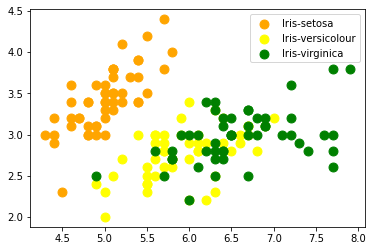

In [12]:
# Visualise Classes all at once

# In this Iris dataset, we have three classes (0,1,2)
# We visualise these classes in a 2-D graph 
# This will help us in comparing the original classes with the clusters created 
# Plot the three type of flowers on a graph

plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], 
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], 
            s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], 
            s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()

# Inference : 
# We find that we have three classes with two types of Iris flowers overlapping each other

In [13]:
# DBSCAN Clustering

# Declaring Model
clt_DB = DBSCAN()

# By Default Parameters in dbscan
clt_DB

# Inference :
# By Default 
# eps = 0.5, if we increase this size of cluster will increase
# distance metric = euclidean
# min_samples = 5

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [14]:
# Fitting the model
model_dbscan = clt_DB.fit(iris_X)
pred_dbscan = model_dbscan.labels_
print("DBScan Output Cluster v1")
print(pred_dbscan)

#Frequency count of the Output clusters
unique, counts = np.unique(pred_dbscan, return_counts=True)
freq_1 = dict(zip(unique, counts))
print("Frequency of DBScan Output Cluster v1")
print(freq_1)

# Original Cluster
print("Original Cluster")
print(freq_2)

# Inference :
# Frequency count of 3 Clusters are
# Cluster -1 = 17,Cluster 0 = 49 & Cluster 1 = 84
# So two cluster (0 and 1) is the solution
# -1 Cluster is the outlier
# In short, we have 2 Groups (0,1) & One Outlier = -1
# So 1 Group is missing because of default parameters

DBScan Output Cluster v1
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
Frequency of DBScan Output Cluster v1
{-1: 17, 0: 49, 1: 84}
Original Cluster
{0: 50, 1: 50, 2: 50}


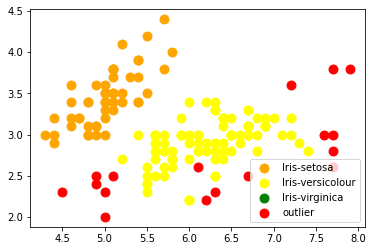

In [15]:
# Visualizing Output

# In the above output, we got value labels: ‘0’, ‘1’, ‘2’ and ‘-1’ 
# ‘-1’ label indicting outliers
# We visualise this output to see how the data has been grouped into clusters.

plt.scatter(iris_X[pred_dbscan == 0, 0], iris_X[pred_dbscan == 0, 1], 
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[pred_dbscan == 1, 0], iris_X[pred_dbscan == 1, 1], 
            s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[pred_dbscan == 2, 0], iris_X[pred_dbscan == 2, 1], 
            s = 80, c = 'green', label = 'Iris-virginica')
plt.scatter(iris_X[pred_dbscan == -1, 0], iris_X[pred_dbscan == -1, 1], 
            s = 80, c = 'red', label = 'outlier')
plt.legend()

# Inference : 
# We find that by using DB Scan some observations are marked as outliers

In [16]:
# Optimize value of eps through Elbow Method

# eps is the maximum distance between two points. 
# It is this distance that the algorithm uses to decide on whether to club the two points together
# We will make use of the average distances of every point to its k nearest neighbors
# These k distances are then plotted in ascending order
# The point where you see an elbow like bend corresponds to the optimal *eps* value
# At that point, a sharp change in the distance occurs, and thus this point serves as a threshold

#! pip install rpy2
%reload_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


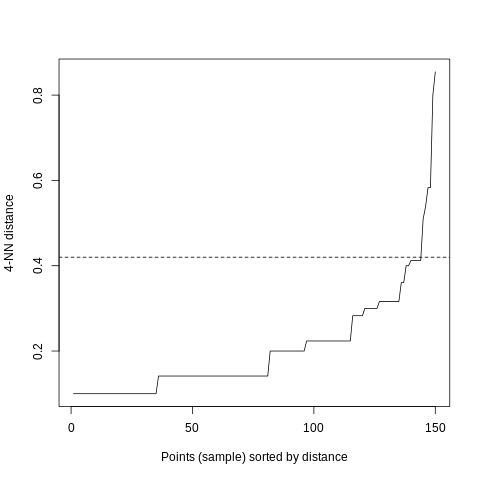

In [17]:
%%R
#install.packages('dbscan')
library(dbscan)
data(iris)
iris <- as.matrix(iris[,1:4])
dbscan::kNNdistplot(iris[, -c(5,4,3)], k =  4)

# Inference : 
# It looks like 0.42 is the optimal value for eps
abline(h = 0.42, lty = 2)

Original Cluster
{0: 50, 1: 50, 2: 50}
DBScan Output Cluster v2
{-1: 29, 0: 48, 1: 37, 2: 36}
Silhouette Score for 3 Clusters
0.3578915366469415




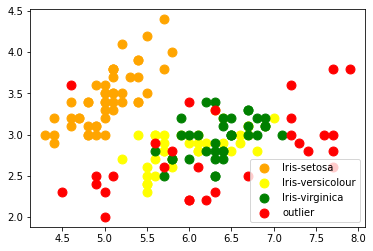

In [18]:
# Now updating value of eps = 0.42

clt_DB = DBSCAN(eps=0.42)
model_dbscan = clt_DB.fit(iris_X)
pred_dbscan = model_dbscan.labels_
print('Original Cluster')
print(freq_2)
# Frequency count of the Output clusters
unique, counts = np.unique(pred_dbscan, return_counts=True)
print('DBScan Output Cluster v2')
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for 3 Clusters')
print(silhouette_score(iris_X,pred_dbscan))

print('\n')

# Visualize 
plt.scatter(iris_X[pred_dbscan == 0, 0], iris_X[pred_dbscan == 0, 1], 
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[pred_dbscan == 1, 0], iris_X[pred_dbscan == 1, 1], 
            s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[pred_dbscan == 2, 0], iris_X[pred_dbscan == 2, 1], 
            s = 80, c = 'green', label = 'Iris-virginica')
plt.scatter(iris_X[pred_dbscan == -1, 0], iris_X[pred_dbscan == -1, 1], 
            s = 80, c = 'red', label = 'outlier')
plt.legend()

# Inference : 
# In DBScan Cluster output Version 1,one class was missing i.e, no '2' class 
# But in DBScan New Output Cluster Version 2, distribution is much better
# So we should check and set parameters correctly i.e, eps
# All which are not classified in any Cluster are classified as OUTLIER
# Silhouette Score is 0.35 which is too less